In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
def find_mask_bounds(image_path):
    """
    Load an RGB image with a white mask and find its bounding box.
    
    Args:
        image_path: Path to the image file
        
    Returns:
        tuple: (top, bottom, left, right) coordinates of the bounding box
    """
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not load image from {image_path}")
    
    # Convert BGR to RGB (OpenCV loads as BGR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale to find white pixels
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find all white pixels (mask area)
    # Assuming white is close to 255, you can adjust threshold if needed
    mask_pixels = np.where(gray > 200)
    
    if len(mask_pixels[0]) == 0:
        raise ValueError("No mask pixels found in the image")
    
    # Find extreme coordinates
    top = np.min(mask_pixels[0])      # topmost y-coordinate
    bottom = np.max(mask_pixels[0])   # bottommost y-coordinate
    left = np.min(mask_pixels[1])     # leftmost x-coordinate
    right = np.max(mask_pixels[1])    # rightmost x-coordinate
    
    return img_rgb, top, bottom, left, right

def draw_bounding_box(img, top, bottom, left, right):
    """
    Draw a bounding box on the image.
    
    Args:
        img: RGB image array
        top, bottom, left, right: Bounding box coordinates
    """
    # Create a copy to draw on
    img_with_box = img.copy()
    
    # Draw the bounding box (in red)
    color = (255, 0, 0)  # Red in RGB
    thickness = 2
    
    # Draw rectangle
    cv2.rectangle(img_with_box, (left, top), (right, bottom), color, thickness)
    
    # Display the image
    plt.figure(figsize=(10, 8))
    plt.imshow(img_with_box)
    plt.title(f'Bounding Box: Top={top}, Bottom={bottom}, Left={left}, Right={right}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return img_with_box

def save_bbox_to_txt(image_path, top, bottom, left, right):
    """
    Save bounding box coordinates to a text file in COCO format.
    COCO format: [x, y, width, height]
    where (x, y) is the top-left corner
    
    Args:
        image_path: Path to the original image file
        top, bottom, left, right: Bounding box coordinates
    """
    # Get the base filename without extension
    base_name = os.path.splitext(image_path)[0]
    txt_path = f"{base_name}.txt"
    
    # Convert to COCO format: [x, y, width, height]
    x = left
    y = top
    width = right - left
    height = bottom - top
    
    # Save coordinates to file in COCO format
    with open(txt_path, 'w') as f:
        f.write(f"{x} {y} {width} {height}\n")
    
    print(f"Bounding box saved to: {txt_path}")
    print(f"COCO format [x, y, width, height]: [{x}, {y}, {width}, {height}]")
    return txt_path

Bounding Box Coordinates:
  Top:    131
  Bottom: 444
  Left:   0
  Right:  702

Bounding Box Size: 702 x 313 pixels
Bounding box saved to: test-images/masks/camo-fish.txt
COCO format [x, y, width, height]: [0, 131, 702, 313]


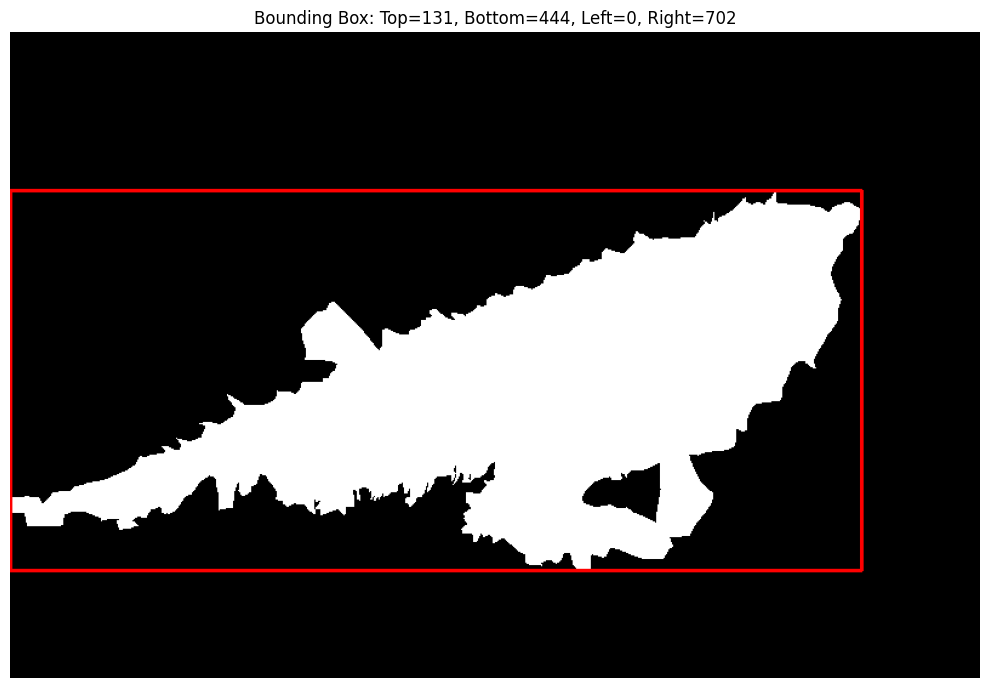

In [12]:
# Replace with your image path
image_path = "test-images/masks/camo-fish.png"

try:
    # Find the bounding box
    img, top, bottom, left, right = find_mask_bounds(image_path)
    
    # Print the coordinates
    print(f"Bounding Box Coordinates:")
    print(f"  Top:    {top}")
    print(f"  Bottom: {bottom}")
    print(f"  Left:   {left}")
    print(f"  Right:  {right}")
    print(f"\nBounding Box Size: {right - left} x {bottom - top} pixels")
    
    # Save bounding box to text file
    save_bbox_to_txt(image_path, top, bottom, left, right)
    
    # Draw and display the bounding box
    draw_bounding_box(img, top, bottom, left, right)
    
except Exception as e:
    print(f"Error: {e}")